# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

Report and code output are integrated through the remainder of this notebook

## 1. Data Validation: Import and Process Data
Follow along!

In [20]:
# Start coding here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("recipe_site_traffic.csv")
df.head(50)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


Quickly skimming through the first 50 rows of recipe data, we could tell that there might be data entry errors.

For example, in row 20 (recipe 21), a Potato dish with 17.44g carbs/8.16g sugar/10.81g protein only consists of 9.26 calories. This does not add up as carbs/fat/protein have 4/9/4 calories per gram, respectively.

In row 24 (recipe 25), a single serving breakfast consisting of 1.53g carbs/8.88g sugar/12.57g protein ends up being 1161.49 calories. Interesting that it still had `high_traffic`.

The data does not account for fat(g) in the recipe, which is the macronutrient with the highest calorie count. It would also be an important factor in determining whether a recipe has `high_traffic` due to lifestyle choices, dietary concerns and restrictions. Some other features to include: fiber, sodium, unsaturated vs. saturated vs. trans fat. But we are thankful for the data that we do have.

Lastly, it would be interesting to understand how `high_traffic` is determined. Is there a threshold of number of visits a recipe page has to get?

### Check Null Values

In [21]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

### Check value type to see if they match against description in table

In [22]:
# check
for column in df.columns:
    print(df[column])

0        1
1        2
2        3
3        4
4        5
      ... 
942    943
943    944
944    945
945    946
946    947
Name: recipe, Length: 947, dtype: int64
0          NaN
1        35.48
2       914.28
3        97.03
4        27.05
        ...   
942    1161.00
943        NaN
944     951.74
945     266.61
946     184.56
Name: calories, Length: 947, dtype: float64
0        NaN
1      38.56
2      42.68
3      30.56
4       1.85
       ...  
942     5.31
943      NaN
944    29.42
945    35.77
946    45.21
Name: carbohydrate, Length: 947, dtype: float64
0        NaN
1       0.66
2       3.09
3      38.63
4       0.80
       ...  
942    22.39
943      NaN
944     3.57
945     0.97
946     6.20
Name: sugar, Length: 947, dtype: float64
0        NaN
1       0.92
2       2.88
3       0.02
4       0.53
       ...  
942    44.22
943      NaN
944    13.87
945     8.07
946     0.03
Name: protein, Length: 947, dtype: float64
0              Pork
1            Potato
2         Breakfast
3        

### Check `category` only takes on {'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'}

In [23]:
allowed_values = {"Lunch/Snacks", "Beverages", "Potato", "Vegetable", "Meat", "Chicken", "Pork", "Dessert", "Breakfast", "One Dish Meal"}

invalid_values = df[~df['category'].isin(allowed_values)]['category']
print(invalid_values.unique())
invalid_values

['Chicken Breast']


6      Chicken Breast
32     Chicken Breast
38     Chicken Breast
40     Chicken Breast
43     Chicken Breast
            ...      
905    Chicken Breast
913    Chicken Breast
933    Chicken Breast
939    Chicken Breast
941    Chicken Breast
Name: category, Length: 98, dtype: object

Seems like only "Chicken Breast" was not correctly categorized as "Chicken". Let's replace them with the correct expected value. Checking again afterwards —- we are all set.

In [24]:
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

In [25]:
df[~df['category'].isin(allowed_values)]['category']

Series([], Name: category, dtype: object)

### Replace `null` values (`calories`, `carbohydrate`, `sugar`, `protein`) for 52 recipes
Important note: From observing the rows of data in the csv file, and as per convension by the FDA, we assume that the `calories`, `carbohydrate`, `sugar`, `protein` fields are **per serving**, not the entire recipe (which may include > 1 servings).

In [26]:
calories_means = df.groupby('category')['calories'].transform('mean')
carbohydrate_means = df.groupby('category')['carbohydrate'].transform('mean')
sugar_means = df.groupby('category')['sugar'].transform('mean')
protein_means = df.groupby('category')['protein'].transform('mean')

df['calories'].fillna(calories_means,inplace=True)
df['carbohydrate'].fillna(carbohydrate_means,inplace=True)
df['sugar'].fillna(sugar_means,inplace=True)
df['protein'].fillna(protein_means,inplace=True)

### Fix `servings` from string to numerical

In [27]:
import re 
def get_numerical(s):
    numerical_part = re.findall(r'\d+', s)
    if numerical_part:
        return int(numerical_part[0])
    else:
        return None
df['servings'] = df['servings'].apply(get_numerical)

print(df['servings'])

0      6
1      4
2      1
3      4
4      4
      ..
942    2
943    2
944    2
945    6
946    4
Name: servings, Length: 947, dtype: int64


### Convert `high_traffic` string column to Boolean

In [28]:
df['high_traffic'].fillna('Low',inplace=True)
high_traffic_mapping = {'High':True, 'Low':False}
df['high_traffic']=df['high_traffic'].replace(high_traffic_mapping)

### Do one last check to make sure there is no more `null` values

In [29]:
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [30]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.708082,28.076164,8.040137,43.797671,Pork,6,True
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,True
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,False
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,True
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,False


## 2. Exploratory Analysis

### Single variable graphic A: distribution of `calories`

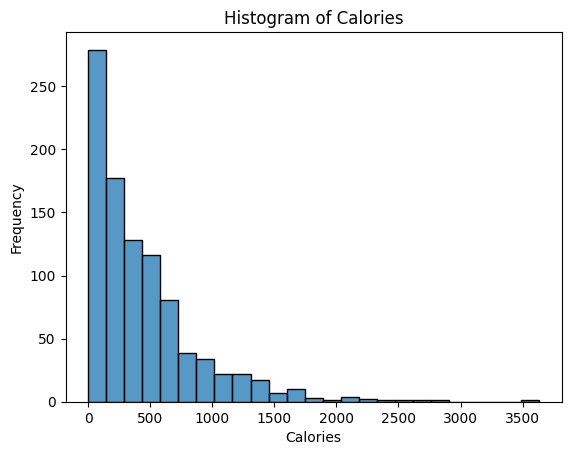

In [31]:
import seaborn as sns

sns.histplot(data=df, x='calories', bins=25)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories')
plt.show()

The calories distribution is right skewed (exponentially distributed), with a large proportion of recipes being under 250 calories! There are some outliers in the 2000+ range, but they should not impact our analysis work too much.

### Single variable graphic B: composition of `high_traffic`

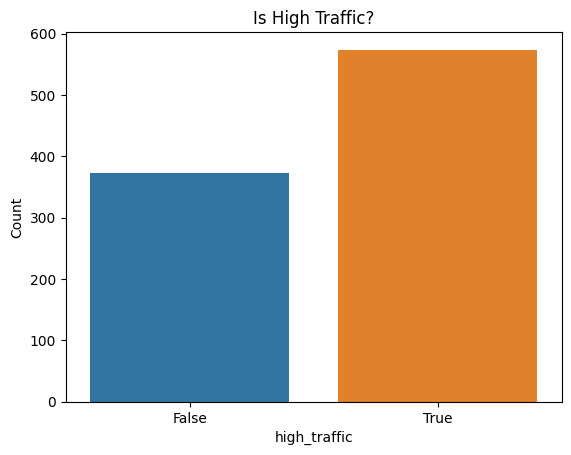

In [32]:
sns.countplot(data=df, x='high_traffic')
plt.ylabel('Count')
plt.title('Is High Traffic?')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

There is some information asymmetry in the `high_traffic` categories, our dependent variable. The asymmetry is quite reasonable, however, about 40-60. Future data augmentation could be considered.

### Multi-variable graphic A: scatterplots between `calories` and `category`, `carbohydrate`, `sugar`, `protein`

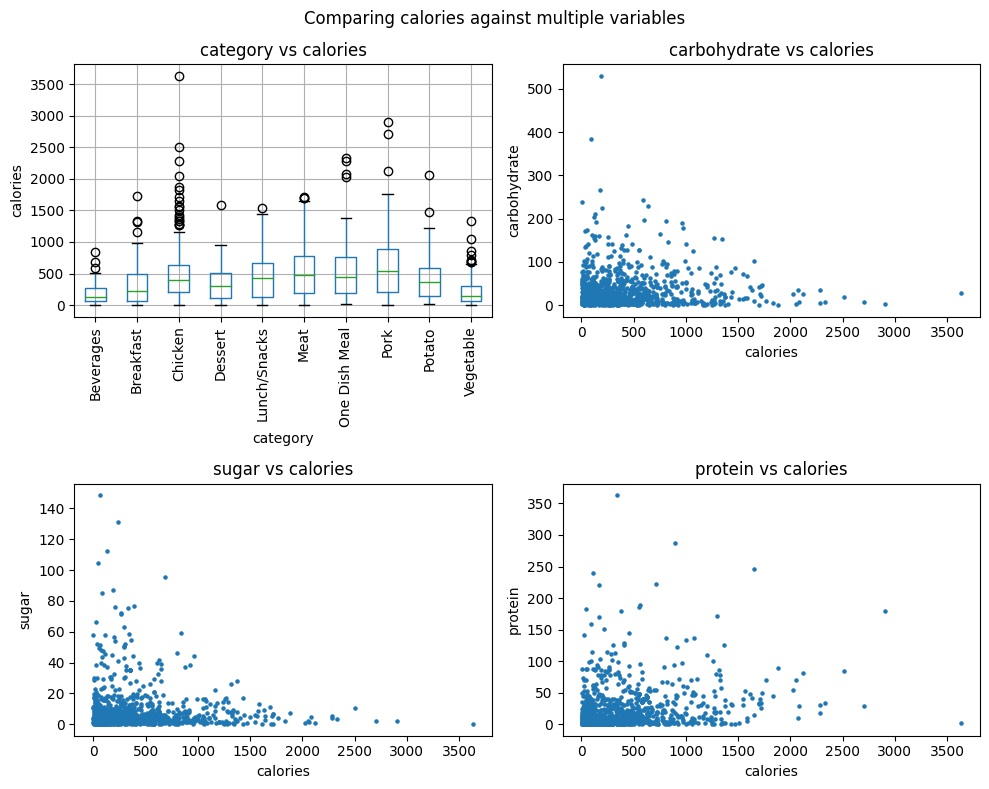

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

bp = df.boxplot(column='calories', by='category', ax=axes[0, 0])
axes[0, 0].set_title('category vs calories')
axes[0, 0].set_xlabel('category')
axes[0, 0].set_ylabel('calories')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

axes[0, 1].scatter(df['calories'], df['carbohydrate'], marker='o', s=5)
axes[0, 1].set_title('carbohydrate vs calories')
axes[0, 1].set_xlabel('calories')
axes[0, 1].set_ylabel('carbohydrate')

axes[1, 0].scatter(df['calories'], df['sugar'], marker='o', s=5)
axes[1, 0].set_title('sugar vs calories')
axes[1, 0].set_xlabel('calories')
axes[1, 0].set_ylabel('sugar')

axes[1, 1].scatter(df['calories'], df['protein'], marker='o', s=5)
axes[1, 1].set_title('protein vs calories')
axes[1, 1].set_xlabel('calories')
axes[1, 1].set_ylabel('protein')

fig.suptitle("Comparing calories against multiple variables")
plt.tight_layout()

plt.show()

Much to my surprise, there is no visible positive correlation between calories and the other 4 variables, except the recipes with the highest calories seem to fall under the meat dishes, especially chicken. We do not attempt to correct for unknown potential data entry errors in the first part, and we are working with the data as is.

### Multi-variable graphic B: scatterplot between `calories` and `high_traffic`

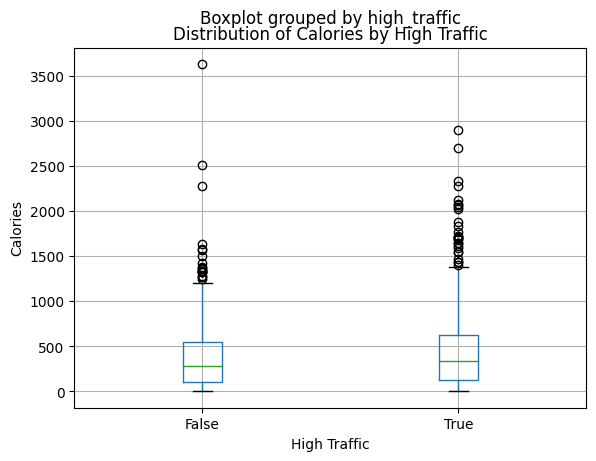

In [34]:
df.boxplot(column='calories', by='high_traffic')

plt.xlabel('High Traffic')
plt.ylabel('Calories')
plt.title('Distribution of Calories by High Traffic')

plt.show()

No statistical significance as to high calorie-recipes having higher or lower traffic. We see outliers of high calorie-recipes in both high traffic and no high traffic recipes. The mean and IQR (interquartile range) are nearly identical for both categories. I do not identify much correlation or relationship between the two variables, much to my surprise, again.

### Multi-variable graphic C: comparing distribution of recipe `category` between is `high_traffic` and is not

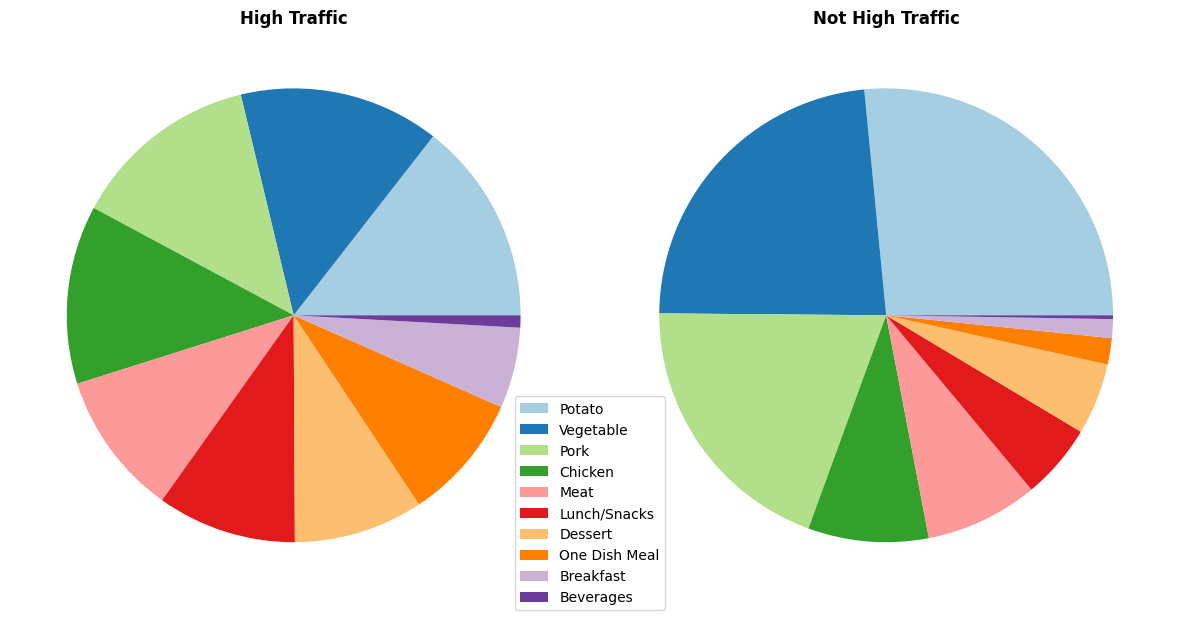

In [35]:
high_traffic_categories = df.loc[df['high_traffic'] == True, 'category']
not_high_traffic_categories = df.loc[df['high_traffic'] == False, 'category']

high_traffic_categories_counts = high_traffic_categories.value_counts()
not_high_traffic_categories_counts = not_high_traffic_categories.value_counts()

colors = sns.color_palette('Paired', len(high_traffic_categories_counts))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(high_traffic_categories_counts.values,colors=colors)
axes[0].set_title('High Traffic', fontweight='bold')

axes[1].pie(not_high_traffic_categories_counts.values,colors=colors)
axes[1].set_title('Not High Traffic', fontweight='bold')

plt.tight_layout()
fig.legend(high_traffic_categories_counts.index,loc='lower center')
plt.show()


This is a breakdown of the category of dishes in both high traffic and low traffic recipes. Potato+Vegetables consist of the largest percentage (almost 50%) of low traffic recipes, followed by Pork+Chicken (> 25%). Potato+Vegetables consist of a marginally higher proportion of high traffic recipes compared to Pork+Chicken, and all 4 categories make up > 50% of high traffic recipes.
Following these 4 categories, we have Meat, Lunch/Snacks, Dessert, One Dish Meal, Breakfast, Beverages, in descending order of proportion. It seems that this order is reflected exactly in both pie charts. This is just a ranking of overall recipe availability across all categories.

## 3. Model Development
Binary classification: each recipe -> is `high_traffic`

I compared fitting LogisticRegression (baseline) vs. an array of comparison models, including RandomForestClassifier, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, K-Nearest Neighbors. I also tried Support Vector Machine, but the training and fitting took extremely long, leading me needing to wait for 1 hour before being able to use this original notebook again.

In [36]:
# baseline model LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X=df.drop(columns=['high_traffic'])
y = df['high_traffic']
X = pd.get_dummies(X, columns=['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=2.0, solver='newton-cg')
model.fit(X_train, y_train)
logistic_predictions = model.predict(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_predictions = qda.predict(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [41]:
# comparison model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
decision_tree_predictions = model.predict(X_test)

## 4. Model Evaluation

The simplest classifiers are the best classifiers in this case. The top two models I picked are Logistic Regression (baseline) and LDA (comparison). More complex models such as QDA, Random Forest, and Decision Trees dropped the accuracy from ~80% to ~55%. Using a larger K-value in the K-Nearest Neighbor algorithm (larger K = lower complexity), using a more complex LDA solver, and using L2 regularization in Logistic Regression do not help. These are indicators proving our dataset is small and simple to begin with. With a little shy of 1000 rows and not too many columns (aka features), we can't extract as much information as we would like. There are also null values and potentially erroneous entries as discussed in Part 1. The model sensitivity (recall) and precision are also ~80%, meaning our model predicts high traffic when it should, and a good proportion of recipes it predicts to be high traffic actually are high traffic. The accuracy is just a little under 80%, but I am confident with perhaps just a little more data we could get it to over 80% in no time.

In [42]:
# Start coding here... 
# Performance of Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

# Performance of RF
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Performance of LDA
lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_precision = precision_score(y_test, lda_predictions)
lda_recall = recall_score(y_test, lda_predictions)
lda_f1 = f1_score(y_test, lda_predictions)
lda_confusion_matrix = confusion_matrix(y_test, lda_predictions)

# Performance of QDA
qda_accuracy = accuracy_score(y_test, qda_predictions)
qda_precision = precision_score(y_test, qda_predictions)
qda_recall = recall_score(y_test, qda_predictions)
qda_f1 = f1_score(y_test, qda_predictions)
qda_confusion_matrix = confusion_matrix(y_test, qda_predictions)

# Performance of KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

# Performance of Decision Tree Classifier model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)

# display the metrics side by side
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1],
    # 'Random Forest Classifier': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'LDA': [lda_accuracy, lda_precision, lda_recall, lda_f1]
    # 'QDA': [qda_accuracy, qda_precision, qda_recalll, qda_f1],
    # 'K-Nearest Neighbors': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    # 'Decision Tree Classifier': [decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1]
})

print(metrics_df)

      Metric  Logistic Regression       LDA
0   Accuracy             0.768421  0.757895
1  Precision             0.794872  0.791304
2     Recall             0.823009  0.805310
3   F1 Score             0.808696  0.798246


## Concluding Remarks
### Summary and Recommendations
I wish I could give some insight into whether higher or lower caloric recipes would attract more traffic. I thought there would be some correlation between `high_traffic` vs. sugar & macronutrients (protein/carbohydrates). It turns out there is yet a significant relationship to be drawn among them.

As for the need for more data or more **informative** data: Perhaps having the number of grams of fat would give us more prediction power. As discussed, it could be helpful to also know the amount of fiber, sodium, unsaturated vs. saturated vs. trans fat.

We should be able to predict not just `high_traffic` as a black-and-white label, but rather a % or likelihood a recipe would have high traffic. This could potentially be achieved if we could ask for qualitative metrics of the amount of traffic on each recipe (rather than a boolean indicator), e.g. measured by number of visits. This would give our predictions more granularity.

The business should encourage more people to post. The currently available recipe posts is a good insight into the demand of brownsers on the recipe site: therefore, the simplest **metric** would be to track `category` of recipes. Potatoes and Vegetables categories consist of the majority of recipes on the site, followed by Pork and Chicken. From a user-facing perspective, we could show more vegetarian-based recipes, like a "vegetarian/vegan-friendly" section or page. On a meat-based recipe page, we would have chicken and pork-based recipes be shown higher up or suggest more recipes that incorporate these meat types.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation